In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("titanic_data.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial investigation of the data set

In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


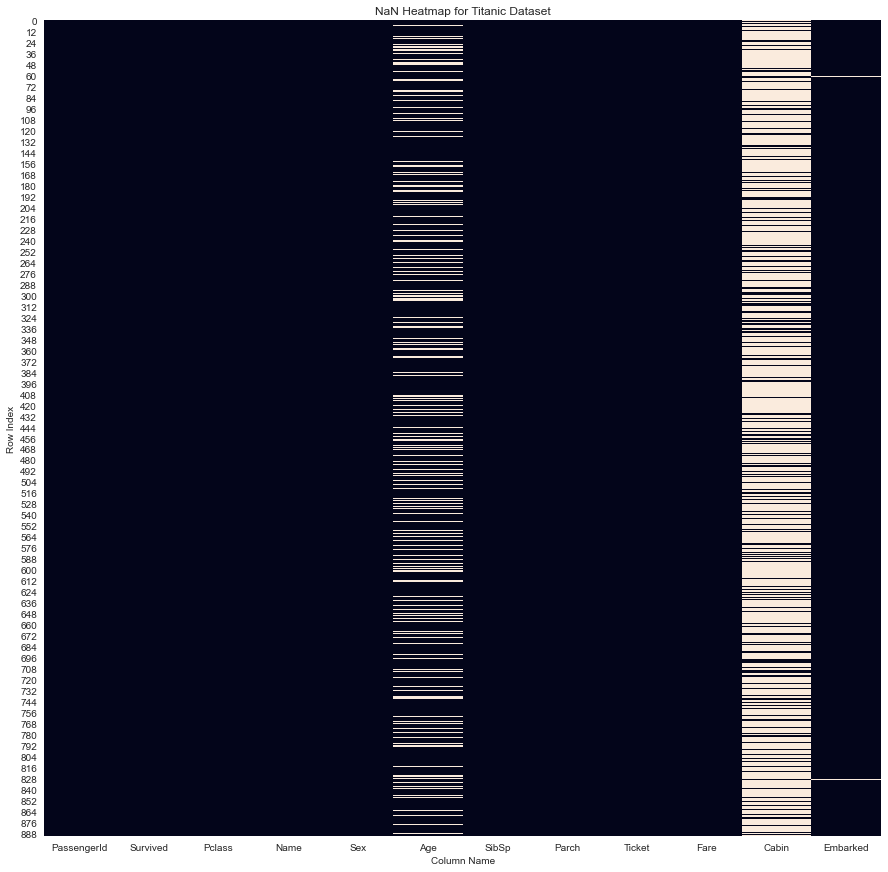

In [5]:
#set figure size
plt.figure(figsize=(15,15))

# create heatmap
sns.heatmap(titanic.isna(), cbar=False)

plt.title("NaN Heatmap for Titanic Dataset")
# plt.yticks(np.arange(0, titanic.shape[0], 500))
plt.xlabel("Column Name")
plt.ylabel("Row Index")

#save to file
# plt.savefig("plots/titanic_nan_heat.png")

plt.show()

In [6]:
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN




## Convert appropriate columns to category data types

Conversion to the Category data type can save resources and increase the speed of processing.



In [7]:
# The Pclass column is converted to a Category data type
class_category = pd.api.types.CategoricalDtype(categories=[3,2,1], ordered=True)
titanic.Pclass = titanic.Pclass.astype(class_category)

**The Embarked column's values are changed to something more meaningful than the abbreviated embarcation points provided before conversion to the Category data type.**

In [8]:
# Checking the number of distinct values in the Embarked column
titanic.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [9]:
# Change the values to their full description
titanic.Embarked = titanic.Embarked.map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
titanic.Embarked.head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Embarked, dtype: object

In [10]:
# The Embarked column is changed to the Category data type
embarked_category = pd.CategoricalDtype(categories=['Cherbourg', 'Queenstown', 'Southampton'])
titanic.Embarked = titanic.Embarked.astype(embarked_category)

In [11]:
# The Sex column is changed to the Category data type
sex_category = pd.CategoricalDtype(categories=['male', 'female'])
titanic.Sex = titanic.Sex.astype(sex_category)

In [12]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [13]:
# testing the ordering of the Pclass categories
titanic[titanic.Pclass > 3].sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,Southampton
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,Southampton
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,Southampton
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,Southampton
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,Southampton
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,Southampton
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,Southampton
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,Cherbourg
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,Southampton
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,Southampton


In [14]:
# Creating a column using bins with pd.cut() creates a series with the Category data type
age_bins = [0, 18, 40, 65,120]
age_bin_labels = ['Child', 'Adult', 'Middle Aged', 'Senior']

titanic.insert(value=pd.cut(titanic.Age, bins=age_bins, labels=age_bin_labels), loc=6, column='Age Range')

In [15]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
Age Range      category
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [16]:
titanic[['Age', 'Age Range']].sample(5)

,Age,Age Range
263,40.0,Adult
881,33.0,Adult
460,48.0,Middle Aged
653,NaN,NaN
233,5.0,Child


In [17]:
titanic[titanic['Age Range'] > 'Middle Aged'].Survived.mean()

0.125

In [18]:
survivability_by_age_class_sex = titanic.groupby(['Age Range', 'Pclass', 'Sex'], as_index=False).agg([np.mean, 'count', np.sum])['Survived'].sort_values(by='mean', ascending=False)

survivability_by_age_class_sex.rename(columns={'mean': 'pct survived', 'sum': 'no of survivors', 'count': 'total no of people'}, inplace=True)

In [19]:
survivability_by_age_class_sex.shape

(24, 3)

In [20]:
survivability_by_age_class_sex.reset_index(inplace=True)

In [21]:
survivability_by_age_class_sex

,Age Range,Pclass,Sex,pct survived,total no of people,no of survivors
0,Child,2,female,1.000000,14,14
1,Adult,1,female,0.979167,48,47
2,Middle Aged,1,female,0.961538,26,25
3,Adult,2,female,0.914894,47,43
4,Child,1,female,0.909091,11,10
5,Middle Aged,2,female,0.846154,13,11
6,Child,1,male,0.800000,5,4
7,Child,2,male,0.600000,15,9
8,Child,3,female,0.511628,43,22
9,Adult,3,female,0.480000,50,24


In [22]:
survivability_by_age_class_sex.Pclass.corr(survivability_by_age_class_sex['pct survived'])

-0.5064272698396611

In [23]:
embark_group = titanic.groupby(['Embarked'], as_index=False)

In [24]:
embark_group.Survived.mean()

,Embarked,Survived
0,Cherbourg,0.553571
1,Queenstown,0.389610
2,Southampton,0.336957
